## Car Price Prediction
What factors carry most weight in car pricing?

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('input/car-price.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Cleaning and Prep

In [8]:
#Splitting the make from car name

cars['make'] = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.drop('CarName', axis=1, inplace=True)

cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
#Get all unique values of make

#Spelling errors and capitalization errors
cars['make'] = cars['make'].str.lower()

#Replacing mispelled makes
def replace_name(a, b):
    cars['make'].replace(a, b, inplace=True)
    
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')



cars['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
#Checking for duplicate rows
cars.loc[cars.duplicated()]

cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'make'],
      dtype='object')

## Visualizing the data

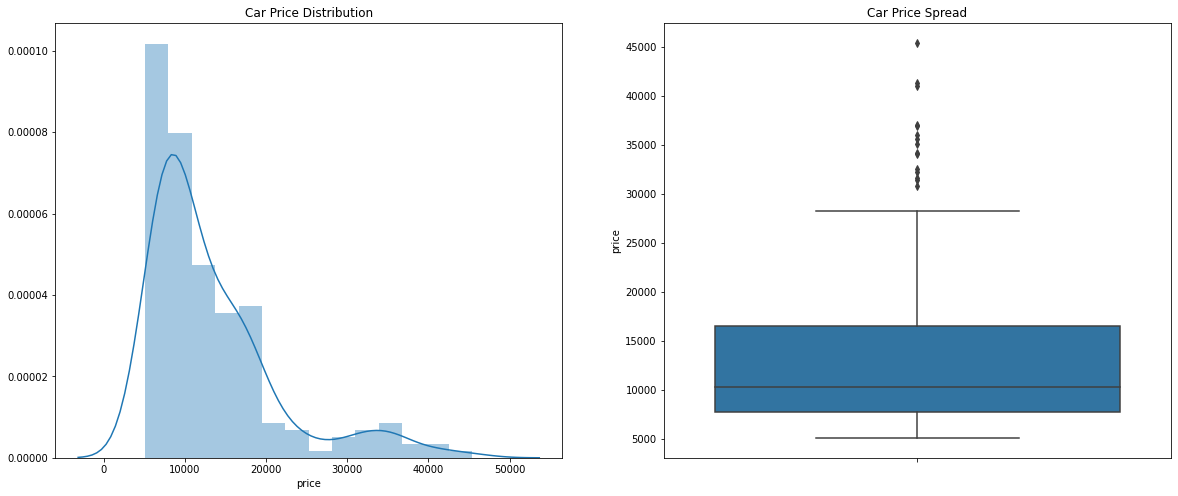

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(cars['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars['price'])

plt.show()

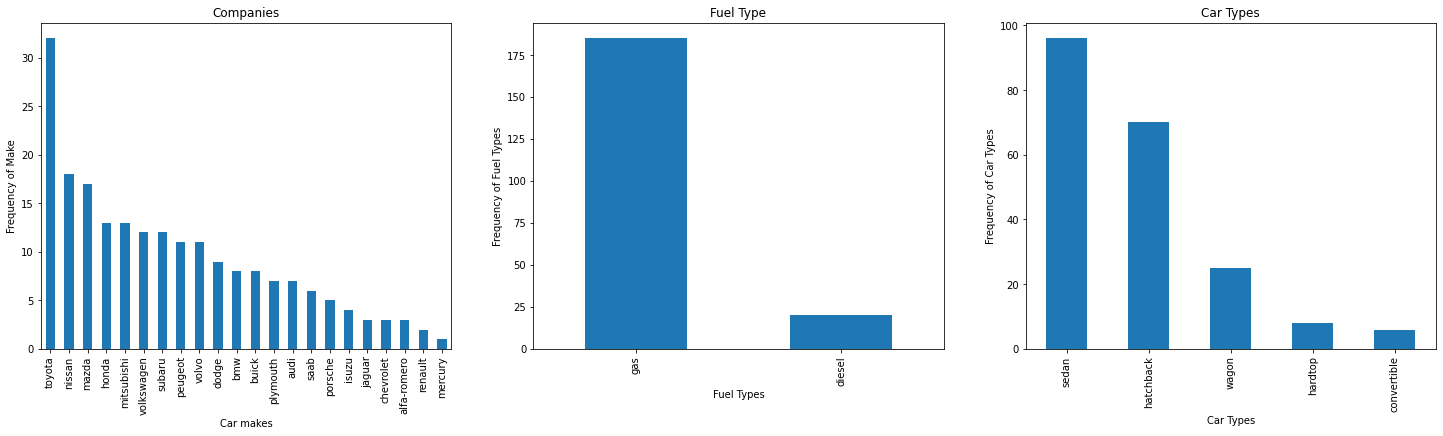

In [44]:
#Visualizing the categorical data

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars['make'].value_counts().sort_values(ascending=False).plot(kind='bar');
plt.title('Companies')
plt1.set(xlabel = 'Car makes', ylabel='Frequency of Make');

plt.subplot(1, 3, 2)
plt1 = cars['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Types', ylabel='Frequency of Fuel Types')


plt.subplot(1,3,3)
plt1 = cars['carbody'].value_counts().plot(kind='bar')
plt.title('Car Types')
plt1.set(xlabel = 'Car Types', ylabel='Frequency of Car Types')

plt.show()

<Figure size 1800x432 with 0 Axes>

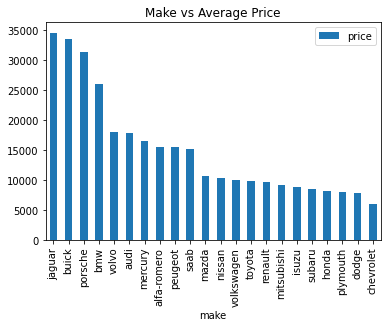

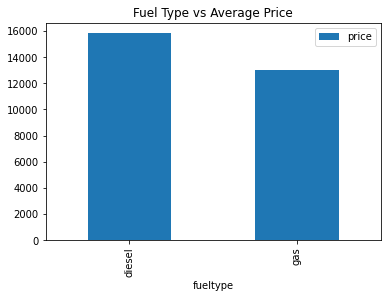

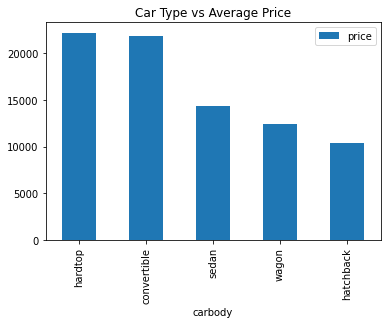

In [63]:
plt.figure(figsize=(25, 6))

#Average price per Make
df = pd.DataFrame(cars.groupby('make')['price'].mean().sort_values(ascending=False))
df.plot(kind='bar')
plt.title('Make vs Average Price')
plt.show()

#Average price per Fuel Type
df = pd.DataFrame(cars.groupby('fueltype')['price'].mean().sort_values(ascending=False))
df.plot(kind='bar')
plt.title('Fuel Type vs Average Price')
plt.show()

#Average price per Car Type
df = pd.DataFrame(cars.groupby('carbody')['price'].mean().sort_values(ascending=False))
df.plot(kind='bar')
plt.title('Car Type vs Average Price')
plt.show()

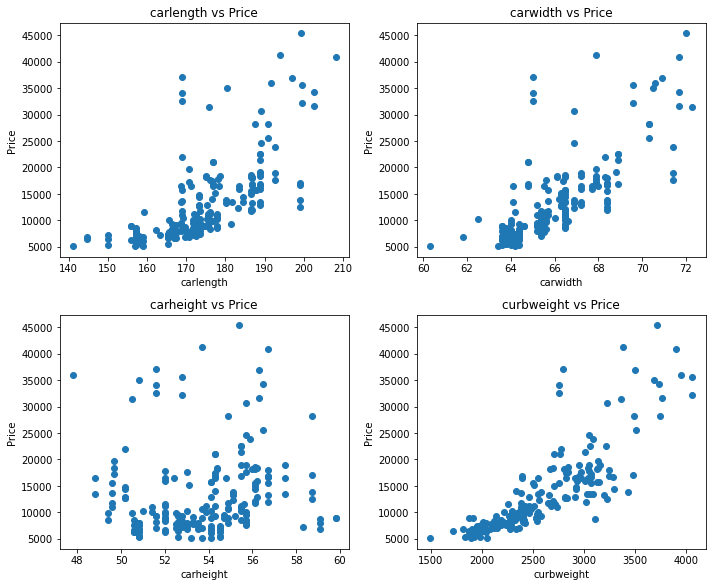

In [66]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

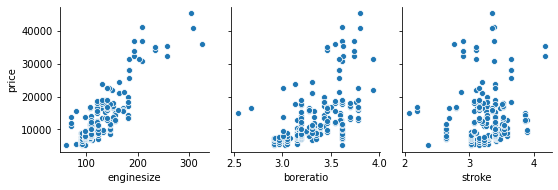

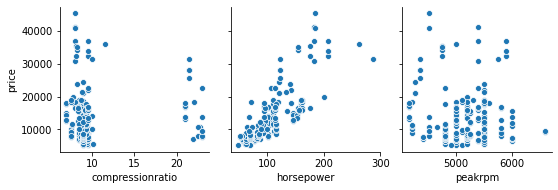

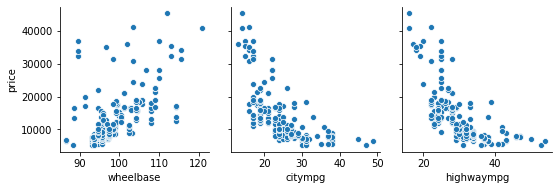

In [68]:
def pair_plot(x, y, z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price', kind='scatter')
    plt.show()
    
pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

In [70]:
#Fuel economy
cars['fuel_eco'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fuel_eco
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,26.70
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,19.80


In [76]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()

table = temp.groupby('make')['price'].mean()
temp = temp.merge(table.reset_index(), how='left', on='make')

bins = [0, 10000, 20000, 40000]
cars_bin = ['budget', 'medium', 'highend']
cars['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)

cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fuel_eco,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,medium


<Figure size 1800x432 with 0 Axes>

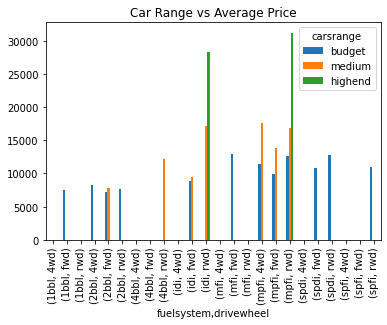

In [81]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot(kind='bar')
plt.title('Car Range vs Average Price')
plt.show()

In [83]:
#All significant features

cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fuel_eco', 'carlength','carwidth', 'carsrange']]
cars_lr

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,25.25,188.8,68.9,medium
201,19045,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,21.70,188.8,68.8,medium
202,21485,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,20.25,188.8,68.9,medium
203,22470,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,26.45,188.8,68.9,medium


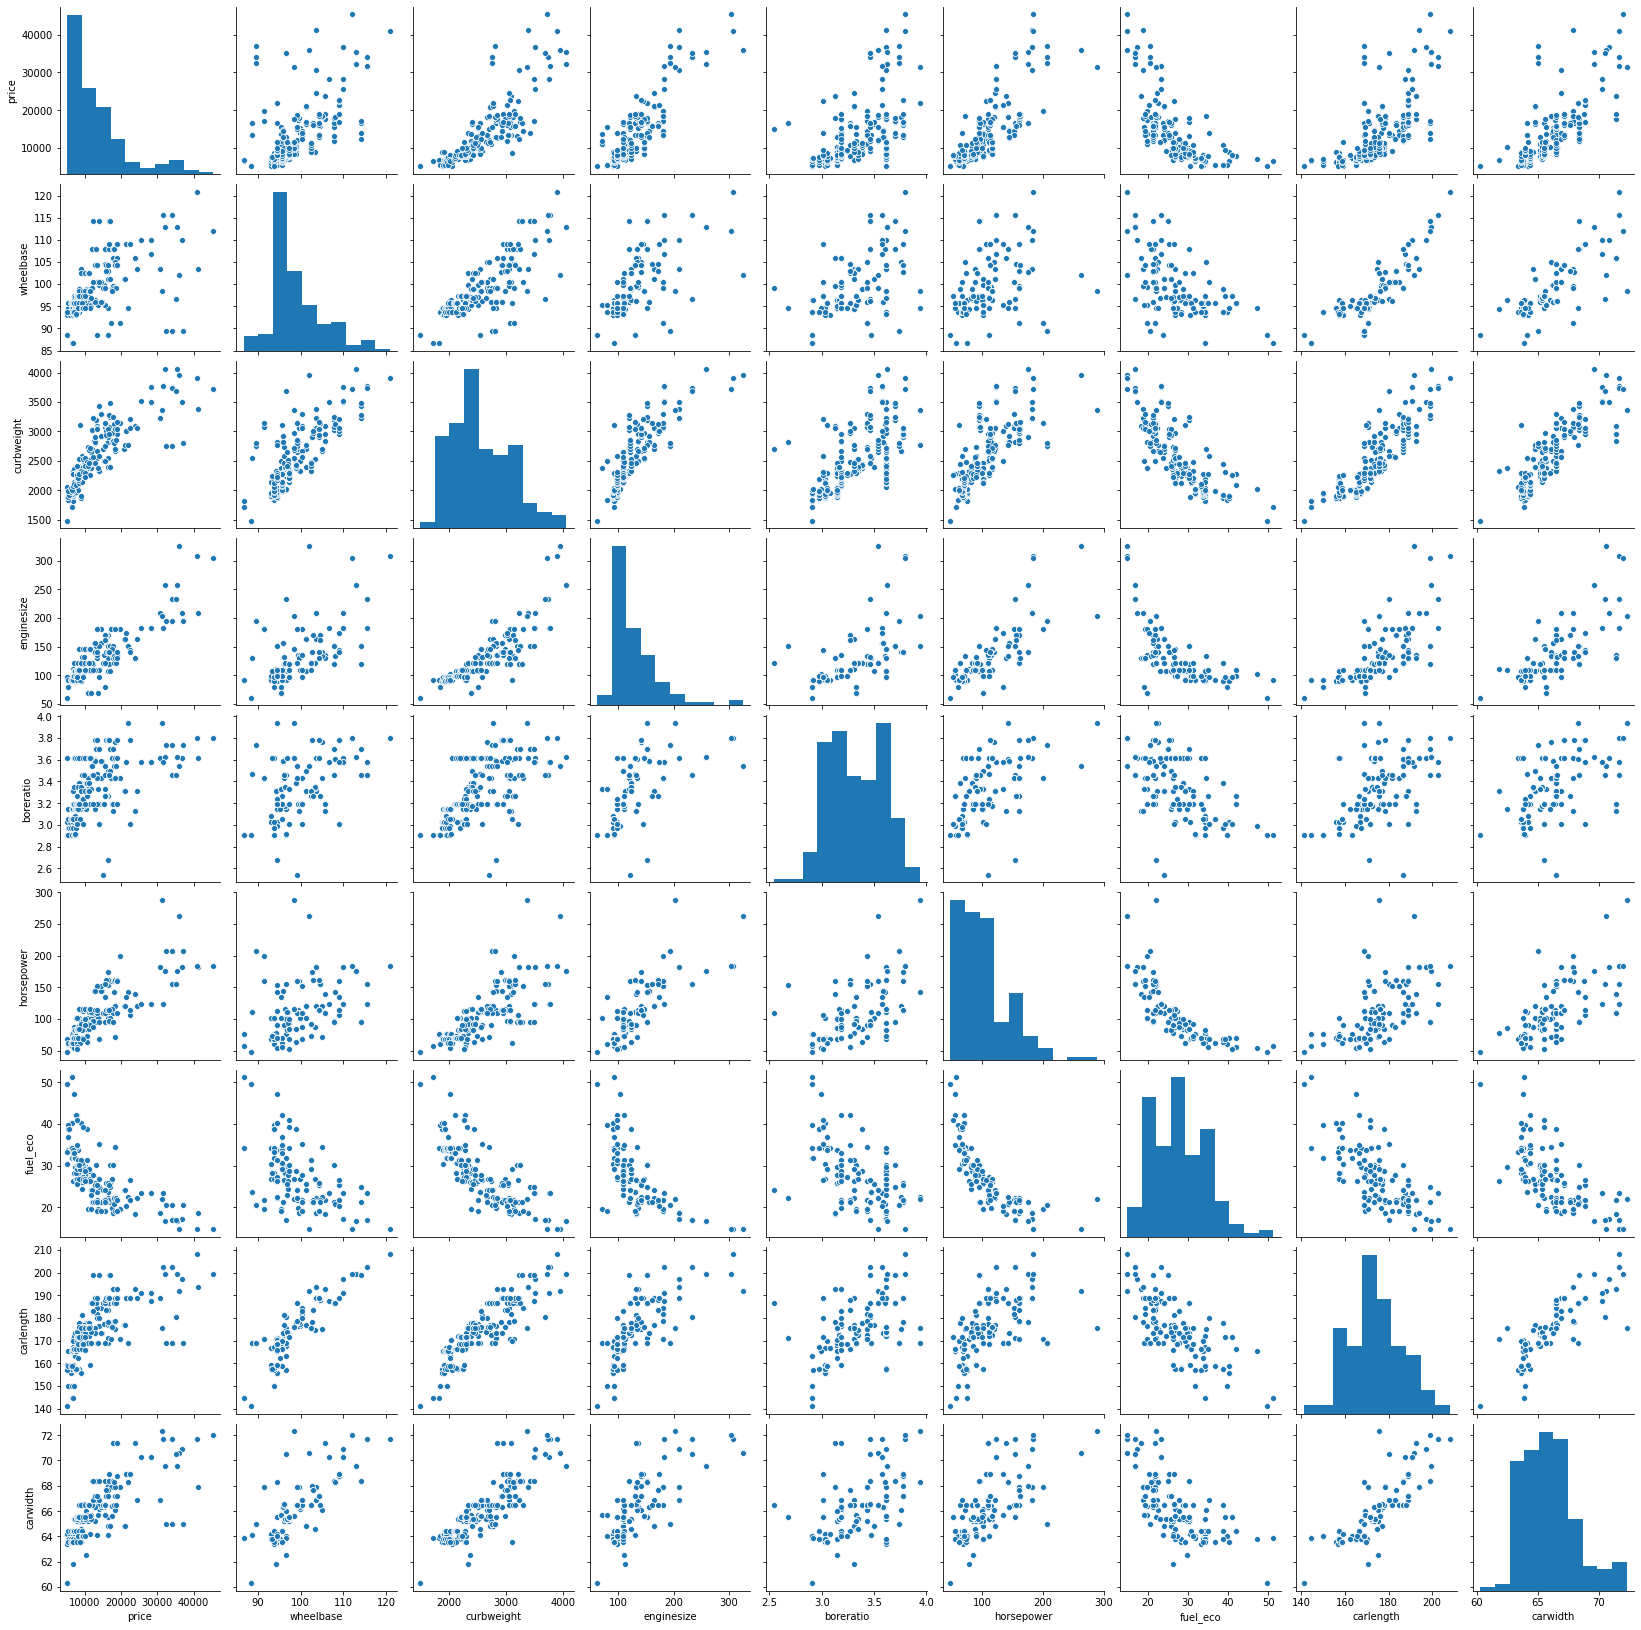

In [84]:
sns.pairplot(cars_lr)
plt.show()

In [85]:
cars_lr = pd.get_dummies(cars_lr, columns=['fueltype', 'aspiration','carbody', 
                                 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange'], drop_first=True)

In [86]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_medium,carsrange_highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


## Train-split data and feature scaling

In [188]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size=0.7, test_size=0.3, random_state=100)

In [189]:
#Scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 
                'horsepower','fuel_eco','carlength','carwidth', 'price']

df_train[num_features] = scaler.fit_transform(df_train[num_features])


In [190]:
#To check if properly min-max scaled
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_medium,carsrange_highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


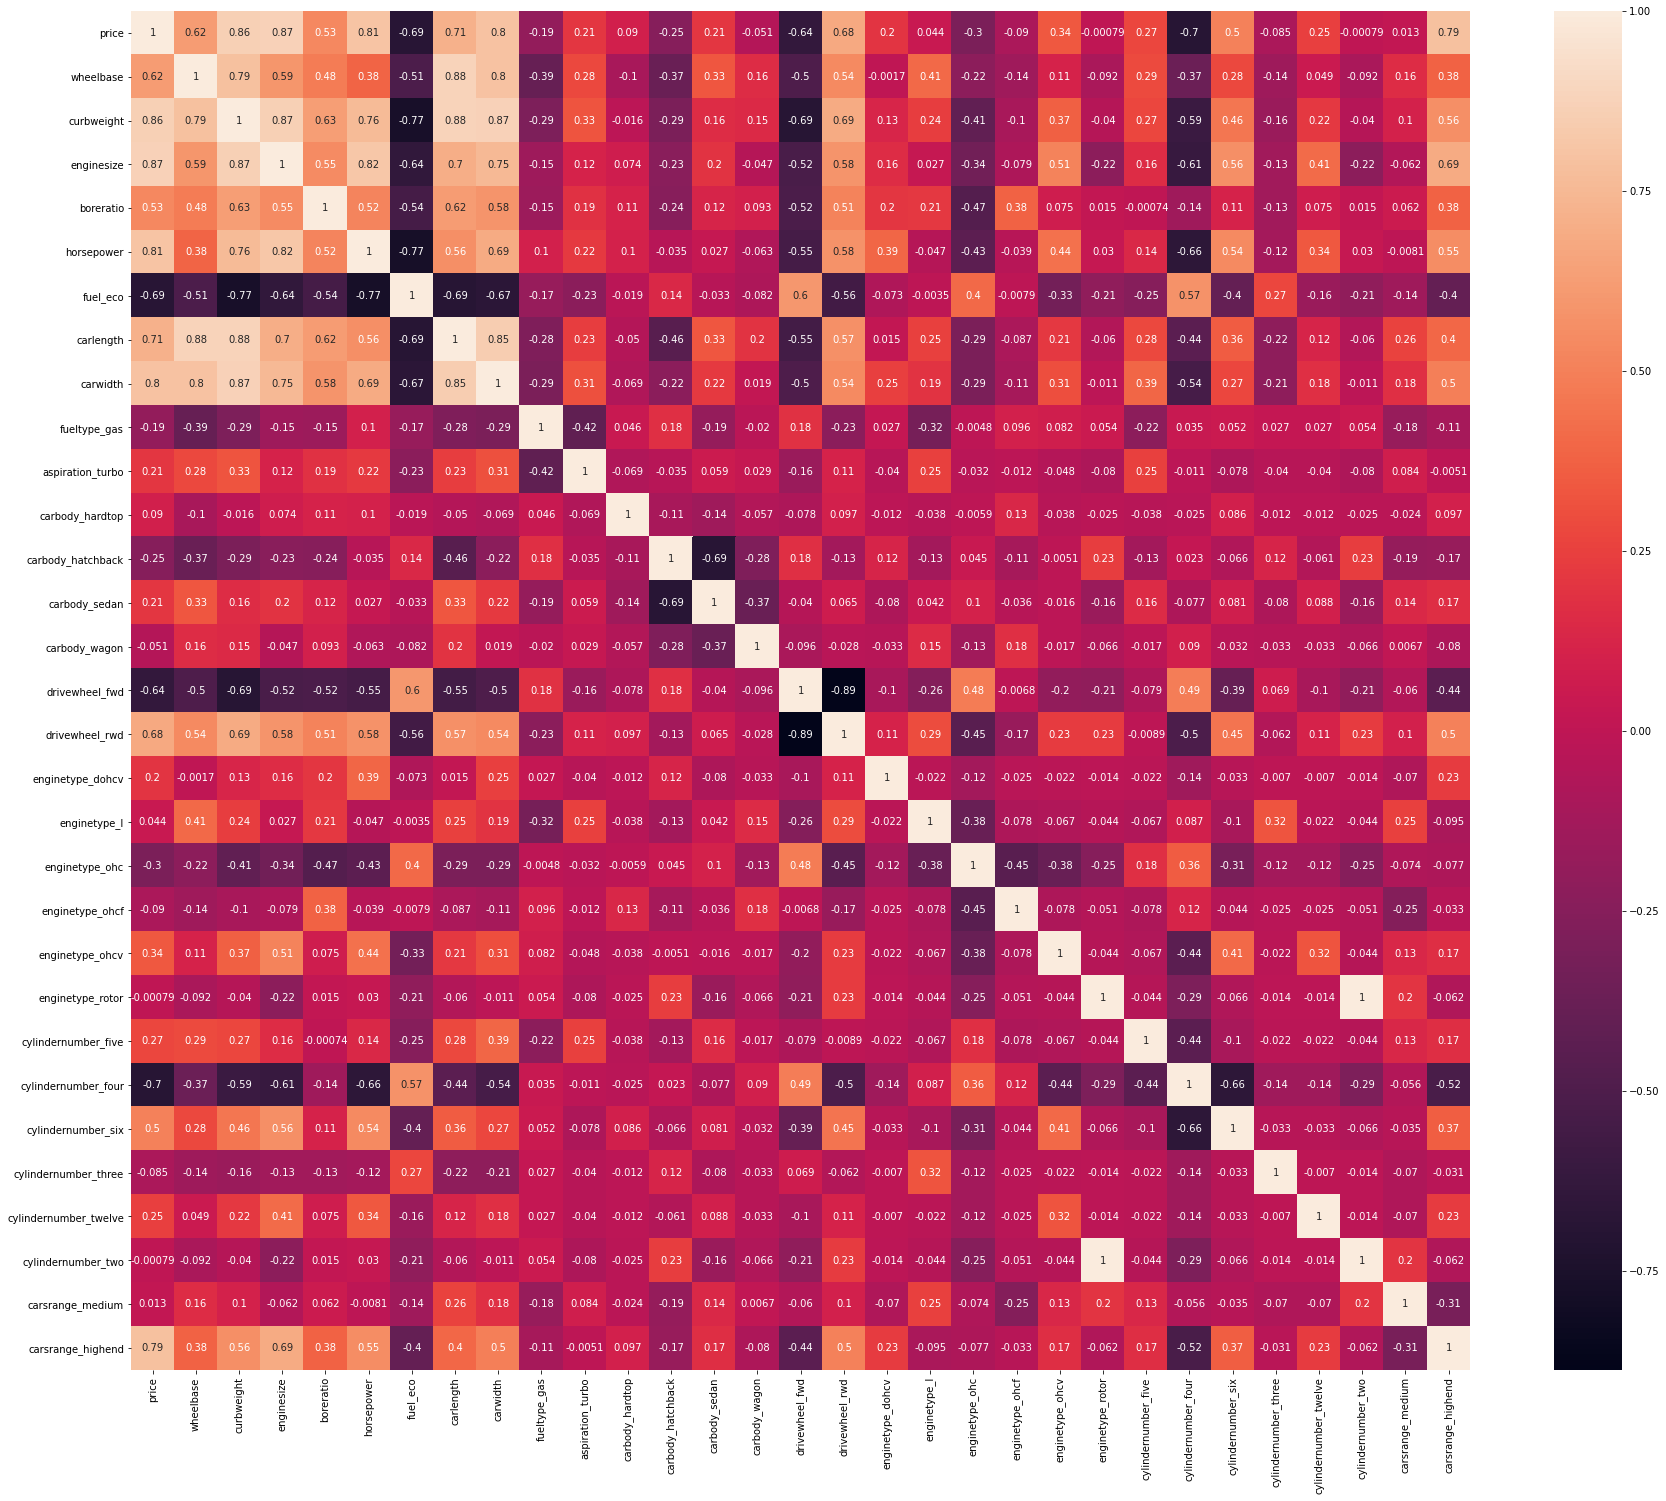

In [192]:
#Correlation metrics
plt.figure(figsize=(30,25))

sns.heatmap(df_train.corr(), annot=True)
plt.show()

# Model building

In [193]:
#Dividing data
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

In [194]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#Recursive feature elimination
rfe = RFE(lr, 10)
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fuel_eco', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 18),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 21),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 20),
 ('carsrange_medium', False, 12),
 ('carsrange_highend', True, 1)]

In [197]:
print(X_train.columns[rfe.support_])

Index(['curbweight', 'horsepower', 'fuel_eco', 'carwidth', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_twelve', 'carsrange_highend'],
      dtype='object')


In [198]:
#Training using the features received from RFE
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fuel_eco,carwidth,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,cylindernumber_twelve,carsrange_highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [199]:
#Building the model 
def build_model(X, y):
    X = sm.add_constant(X)
    lr = sm.OLS(y, X).fit()
    print(lr.summary())
    return X

def check_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['vif'] = round(vif['vif'], 2)
    vif = vif.sort_values(by = "vif", ascending = False)
    return vif

## Model 1

In [200]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.29e-70
Time:                        21:32:05   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [150]:
#Dropping cylindernumber_twelve due to p-val insignificance
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

#Re-evaluating features
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           4.25e-71
Time:                        10:07:19   Log-Likelihood:                -1296.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     133   BIC:                             2643.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2352.9297   1493.52

In [201]:
#Dropping fuel_eco
X_train_new = X_train_new.drop(["fuel_eco"], axis = 1)

#Re-evaluating features
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           4.42e-71
Time:                        21:32:07   Log-Likelihood:                 204.13
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [202]:
#All features have p-val significance greater than 0.05

#Now to find the VIF for identifying multicollinearity
check_vif(X_train_new)

,features,vif
0,const,27.34
1,curbweight,8.21
5,carbody_sedan,6.15
4,carbody_hatchback,5.65
3,carwidth,5.14
2,horsepower,4.04
6,carbody_wagon,3.61
9,carsrange_highend,1.65
7,enginetype_dohcv,1.52
8,cylindernumber_twelve,1.21


In [203]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.56e-69
Time:                        21:32:09   Log-Likelihood:                 197.40
No. Observations:                 143   AIC:                            -376.8
Df Residuals:                     134   BIC:                            -350.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [204]:
check_vif(X_train_new)

,features,vif
0,const,27.31
4,carbody_sedan,6.14
3,carbody_hatchback,5.57
5,carbody_wagon,3.50
1,horsepower,2.79
2,carwidth,2.26
8,carsrange_highend,1.57
6,enginetype_dohcv,1.25
7,cylindernumber_twelve,1.19


In [205]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

In [214]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           3.77e-70
Time:                        21:37:36   Log-Likelihood:                 193.04
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     136   BIC:                            -351.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [206]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           3.77e-70
Time:                        21:32:20   Log-Likelihood:                 193.04
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     136   BIC:                            -351.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [207]:
lr = sm.OLS(y_train, X_train_new).fit()
y_train_price = lr.predict(X_train_new)

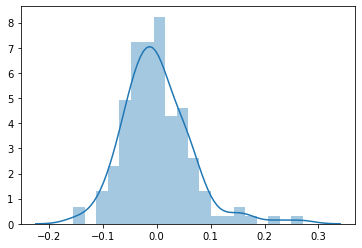

In [208]:
#Plotting errors
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)


In [215]:
#Making predictions
#Scaling the test set
num_features = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fuel_eco','carlength','carwidth','price']
df_test[num_features] = scaler.fit_transform(df_test[num_features])

In [216]:
X_test = df_train.drop('price', axis=1)
y_test = df_train['price']

In [217]:
X_train_new = X_train_new.drop('const', axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new.columns

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [218]:
y_pred = lr.predict(X_test_new)

In [219]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print('r2score: ', r2_score(y_test, y_pred))

print('rmse: ' ,sqrt(mean_squared_error(y_test, y_pred)))

r2score:  0.9148020019287759
rmse:  0.06273417760750358


## Saving model

In [222]:
import pickle

with open('model.bin', 'wb') as f_out:
    pickle.dump(lr, f_out)
    f_out.close()

In [240]:
#Use this as our test
test_veh = X_test_new.loc[0]
test_veh

const                    1.000000
horsepower               0.262500
carwidth                 0.316667
carbody_hatchback        0.000000
enginetype_dohcv         0.000000
cylindernumber_twelve    0.000000
carsrange_highend        0.000000
Name: 0, dtype: float64

In [245]:
test_veh = np.array(test_veh)

In [246]:
#Loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [247]:
model.predict(test_veh)

array([0.16334564])